# Exploration of hormonal receptor genes in Castaldi et al organoid dataset - Metacell calculation by SeaCells

# 1. Environment

## 1.1 Modules

In [2]:
import os
import sys

import numpy as np
import pandas as pd
import scanpy as sc

import pickle

#Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#utils
import ipynbname
from datetime import datetime

# SeaCell
import SEACells

#import custom functions
sys.path.append('../')
import functions as fn

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [3]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [3.5, 3.5]
matplotlib.rcParams['figure.dpi'] = 100

In [4]:
print("Scanpy version: ", sc.__version__)
print("Pandas version: ", pd.__version__)
print("SEACell version: ", SEACells.__version__)

Scanpy version:  1.9.3
Pandas version:  2.0.0
SEACell version:  0.3.3


## 1.2 Settings


In [5]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)

## 1.3 Files and parameters

In [9]:
input_file = '../../../../DataDir/ExternalData/SingleCellData/CastaldiAdata_Metacells.h5ad'

## 1.4 Start computations

In [10]:
print(datetime.now())

2025-07-23 15:58:51.717658


----

# 2. Data Load


## 2.1 Read adata metacells file

In [11]:
adata = sc.read(input_file)
adata

AnnData object with n_obs × n_vars = 249 × 33538
    obs: 'leidenAnnotated', 'leidenAnnotated_purity'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leidenAnnotated_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'lognorm', 'raw'
    obsp: 'connectivities', 'distances'

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


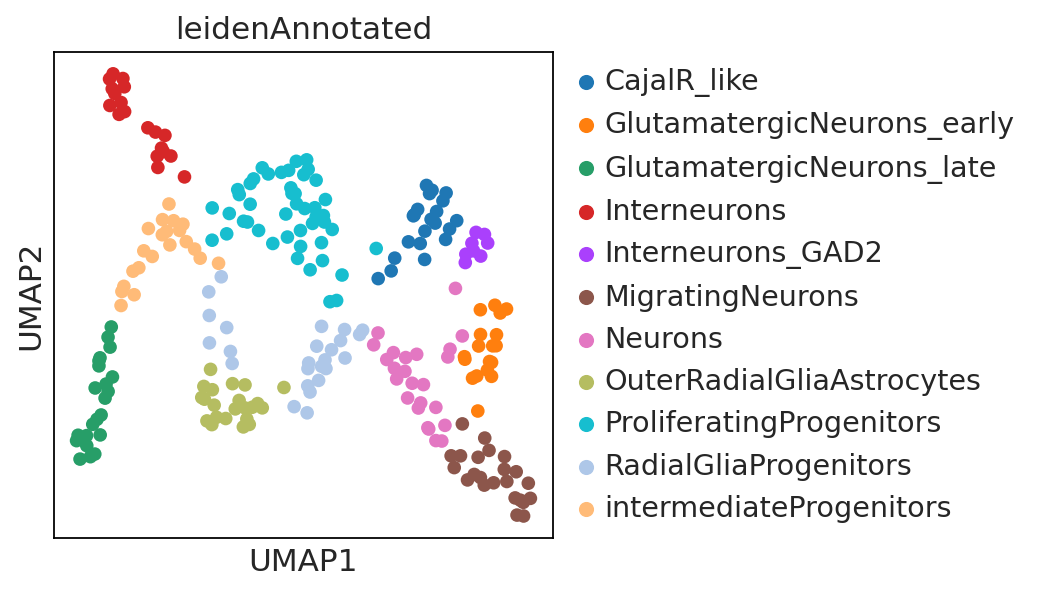

In [12]:
sc.pl.umap(adata, color=['leidenAnnotated'], s=150)

# 3. Exploration of hormonal receptor gene signature expression

In [14]:
signatures = '../../../../DataDir/ExternalData/Receptors/ReceptorsComplete.txt'
sig = pd.read_csv(signatures, sep="\t", keep_default_na=False)  
genes = sig["GeneName"].values.tolist()


The following marker genes are missing:  set()


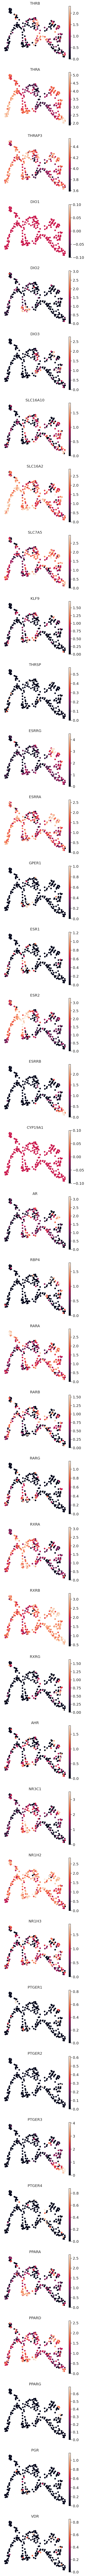

In [17]:
fn.CustomUmap(adata, genes, embedding="X_umap", s=150) 

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


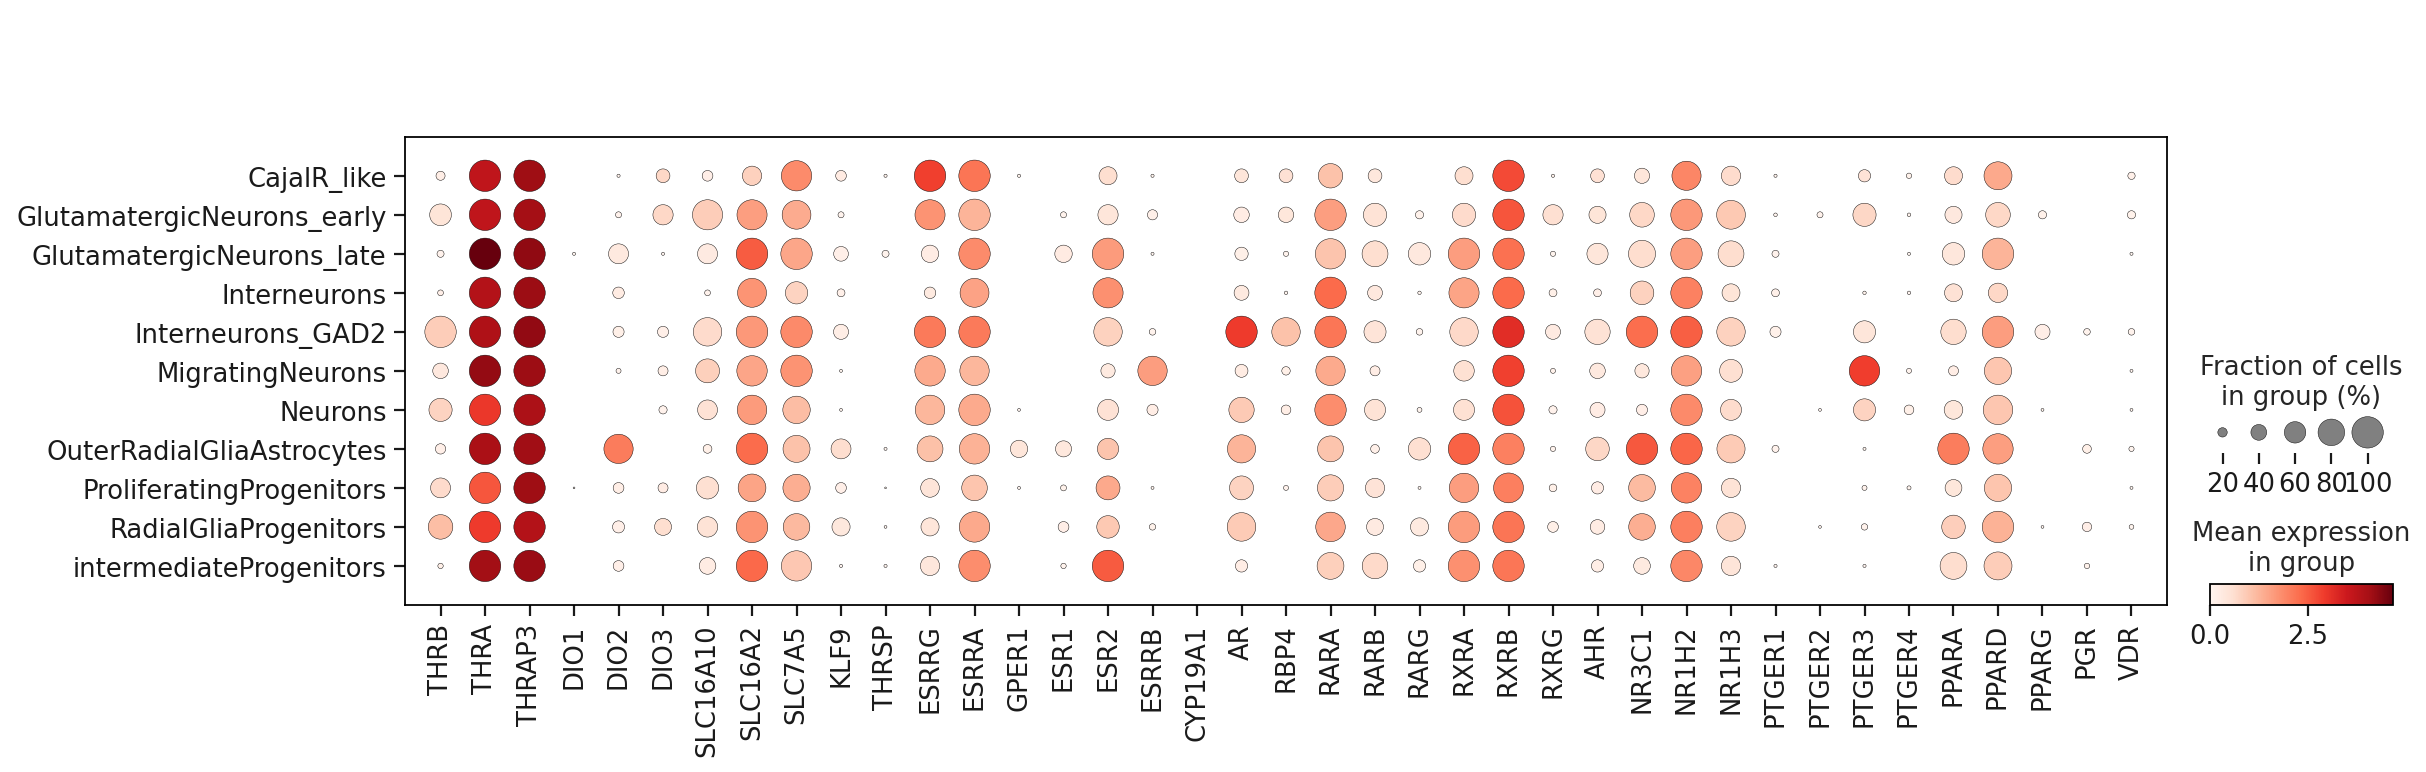

In [25]:
available_genes = [gene for gene in genes if gene in adata.var_names]

if available_genes:
    sc.pl.dotplot(adata, available_genes, groupby='leidenAnnotated')
else:
    print("None of the specified genes are found in adata.var_names.")

# 4 Save in other formats

In [27]:
nb_fname = ipynbname.name()
nb_fname

'SEACellsCastaldi-GeneExploration'

In [28]:
%%bash -s "$nb_fname"
jupyter nbconvert "$1".ipynb --to="python"
jupyter nbconvert "$1".ipynb --to="html"

[NbConvertApp] Converting notebook SEACellsCastaldi-GeneExploration.ipynb to python
[NbConvertApp] Writing 2244 bytes to SEACellsCastaldi-GeneExploration.py
[NbConvertApp] Converting notebook SEACellsCastaldi-GeneExploration.ipynb to html
[NbConvertApp] Writing 4859493 bytes to SEACellsCastaldi-GeneExploration.html


In [24]:
print(datetime.now())

2025-07-23 16:01:41.972220
